<a href="https://colab.research.google.com/github/Archita0905/Sales_Performance_Analysis/blob/main/superstore_final_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


In [2]:
from google.colab import files
uploaded = files.upload()


Saving archive (3).zip to archive (3) (1).zip


In [10]:
import pandas as pd

# Define the path to the CSV file
csv_file_path = "/content/superstore_final_dataset (1).csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path, encoding='latin-1')

# Display the first few rows of the DataFrame
display(df.head())

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [13]:
df.info()
df.isnull().sum()

# Parse date
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d/%m/%Y')

# Add Month Column
df['Month'] = df['Order_Date'].dt.to_period('M')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

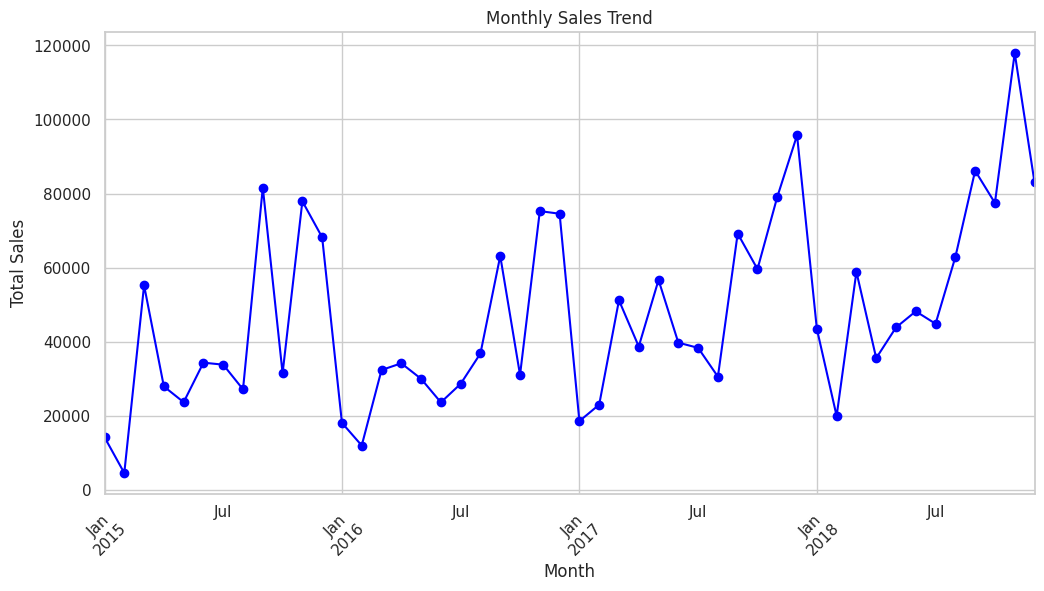

In [14]:
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend', color='blue')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


/tmp/ipython-input-16-3198957059.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')


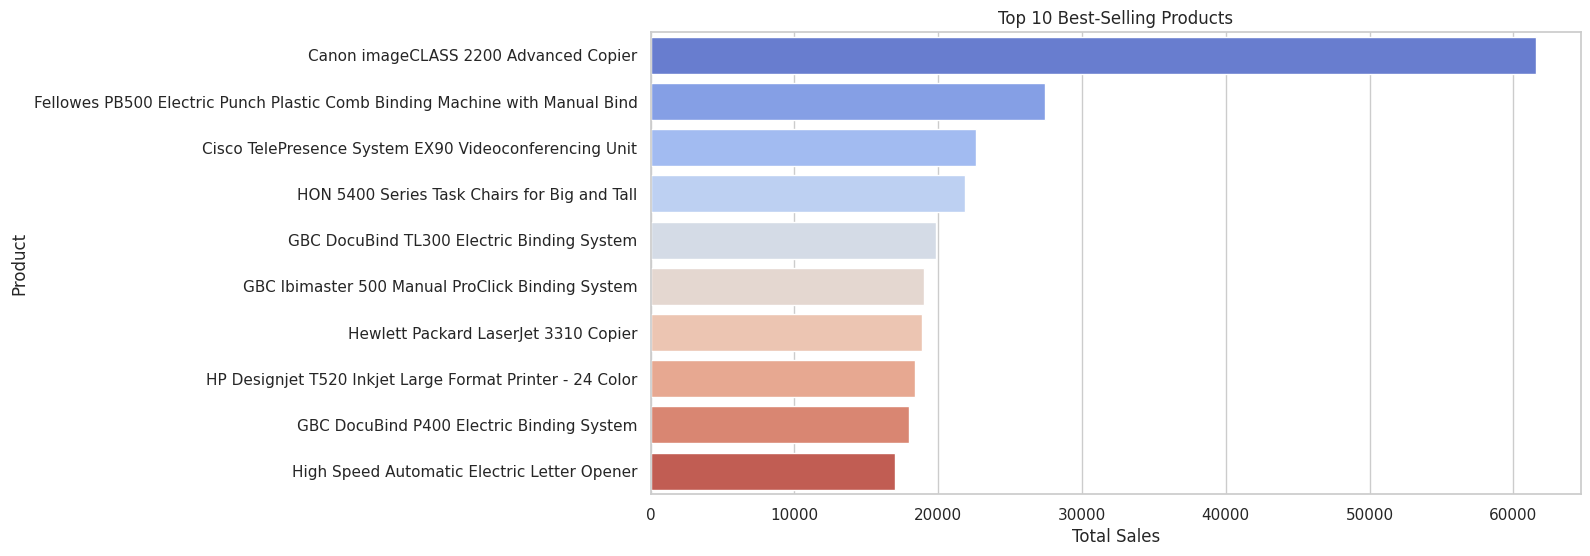

In [16]:
top_products = df.groupby('Product_Name')['Sales'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.show()

/tmp/ipython-input-17-1066977888.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette='viridis')


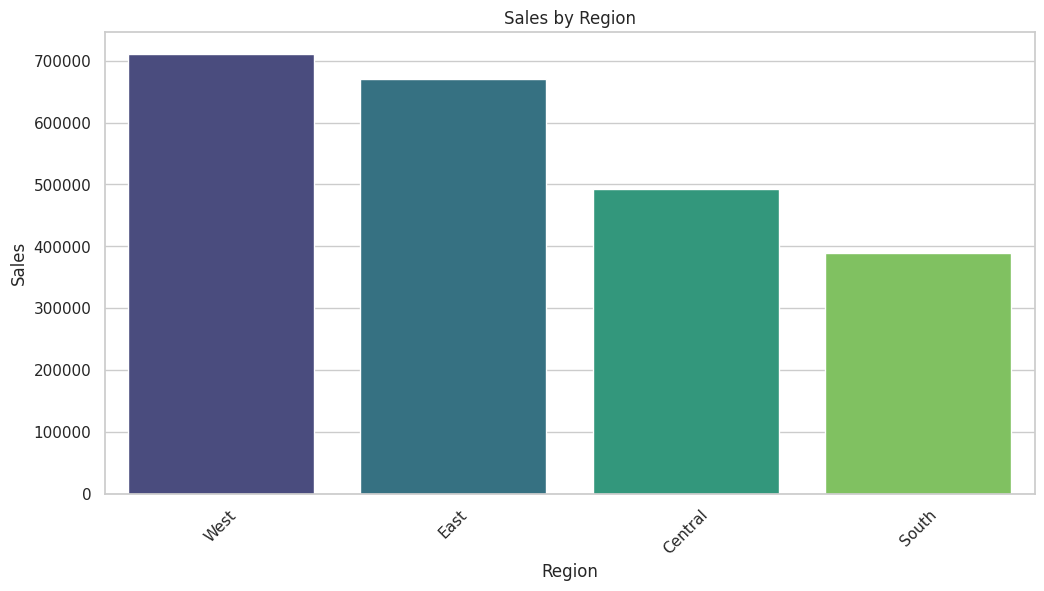

In [17]:

region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

sns.barplot(x=region_sales.index, y=region_sales.values, palette='viridis')
plt.title("Sales by Region")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()


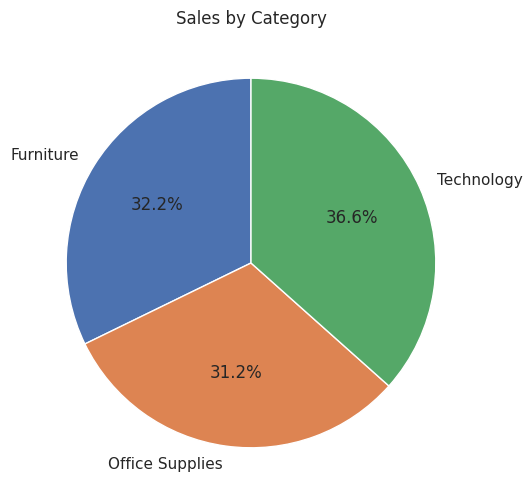

In [18]:

category_sales = df.groupby('Category')['Sales'].sum()

category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Sales by Category")
plt.ylabel("")
plt.show()


In [20]:
total_sales = df['Sales'].sum()
avg_sales = df['Sales'].mean()
top_product = df.groupby('Product_Name')['Sales'].sum().idxmax()

print(f"💰 Total Sales: ₹{total_sales:,.2f}")
print(f"📊 Average Sale: ₹{avg_sales:,.2f}")
print(f"🔥 Best Product: {top_product}")

💰 Total Sales: ₹2,261,536.78
📊 Average Sale: ₹230.77
🔥 Best Product: Canon imageCLASS 2200 Advanced Copier
